# I. Importing **Libraries** & **Data**

## 1. Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import subplots
from ISLP import confusion_table
from imblearn.over_sampling import SMOTE
import sklearn.linear_model as skl
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc, accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

## 2. Data

In [2]:
# Load the data
df = pd.read_csv('heart-disease.csv')
display(df)

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
458,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
459,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0
460,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0


# II. Classifier **Models**

## 1. Exploratory Data Analysis (EDA)

### a. Data Cleaning

In [3]:
# Convert the "famhist" column to a categorical variable
df['famhist'] = df['famhist'].astype('category')
df['famhist'] = LabelEncoder().fit_transform(df['famhist'])
display(df)

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,0,64,28.45,0.00,58,0
458,182,4.20,4.41,32.10,0,52,28.61,18.72,52,1
459,108,3.00,1.59,15.23,0,40,20.09,26.64,55,0
460,118,5.40,11.61,30.79,0,64,27.35,23.97,40,0


### b. Data Exploration

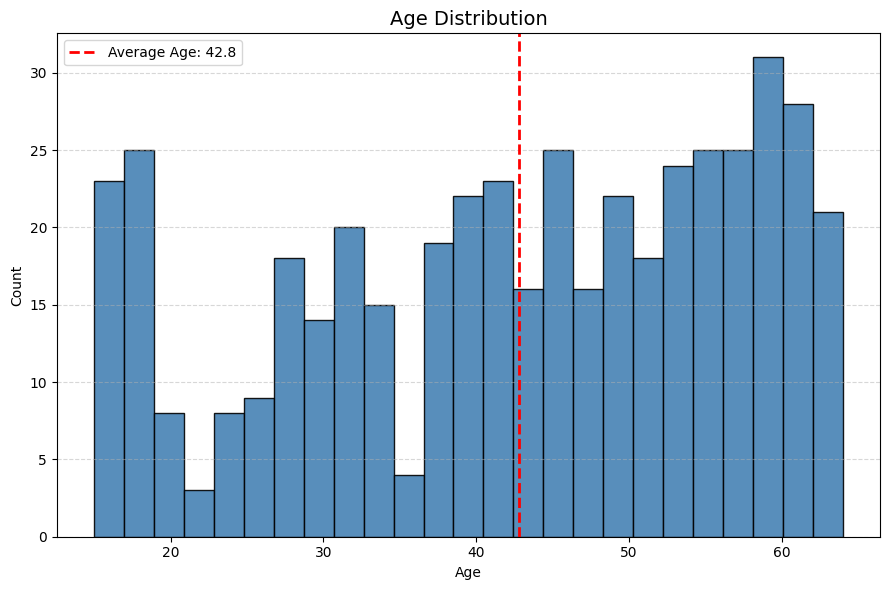

In [4]:
# Calculate average age
avg_age = df['age'].mean()

# Create the histogram
plt.figure(figsize=(9, 6))
plt.hist(df['age'], bins=25, color='steelblue', edgecolor='black', alpha=0.9)

# Add vertical line for mean
plt.axvline(avg_age, color='red', linestyle='--', linewidth=2, label=f'Average Age: {avg_age:.1f}')

# Customize labels and styling
plt.title('Age Distribution', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

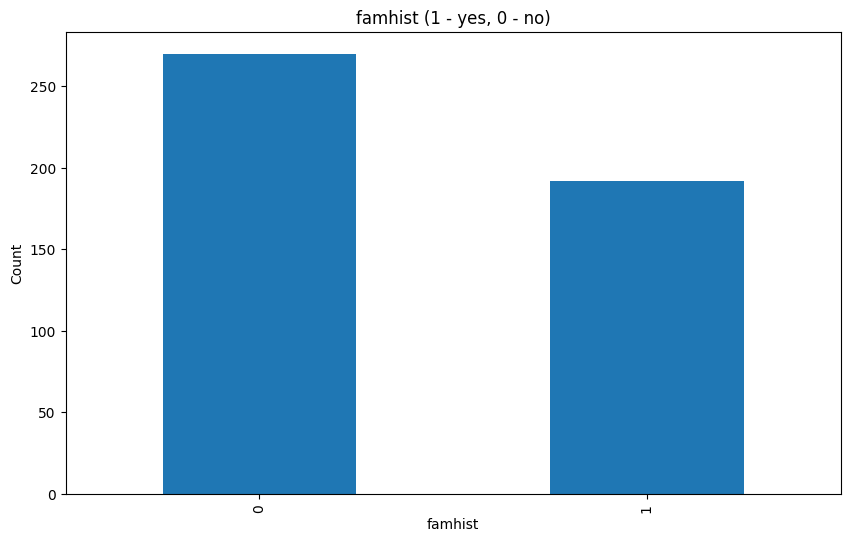

In [5]:
# Get the frequency of each category
category_counts = df['famhist'].value_counts()

# Plot a bar chart
category_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('famhist')
plt.ylabel('Count')
plt.title('famhist (1 - yes, 0 - no)')
plt.show()

### c. Check if data set is balaced or not.

In [6]:
# Class Imbalance
print("Class counts for 'chd' in df:\n", df['chd'].value_counts())
print("\nClass proportions for 'chd' in df:\n", df['chd'].value_counts(normalize=True))

Class counts for 'chd' in df:
 chd
0    302
1    160
Name: count, dtype: int64

Class proportions for 'chd' in df:
 chd
0    0.65368
1    0.34632
Name: proportion, dtype: float64


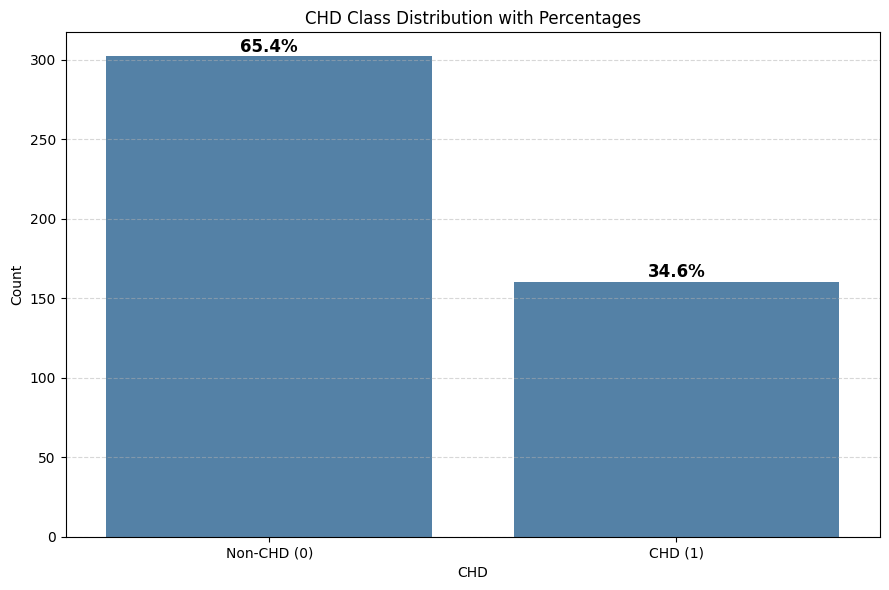

In [7]:
# Count values
class_counts = df['chd'].value_counts()
total = class_counts.sum()
percentages = (class_counts / total * 100).round(1)

# Plot
plt.figure(figsize=(9, 6))
ax = sns.countplot(x='chd', data=df, color='steelblue')

# Annotate percentages on bars
for i, count in enumerate(class_counts):
    percent = percentages[i]
    ax.text(i, count + 3, f'{percent}%', ha='center', fontsize=12, fontweight='bold')

# Labels and styling
plt.title("CHD Class Distribution with Percentages")
plt.xlabel("CHD")
plt.ylabel("Count")
plt.xticks([0, 1], ['Non-CHD (0)', 'CHD (1)'])
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### d. Check if data set is missing values or not.

In [8]:
print(df.isnull().sum())

sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64


### e. Check for correlation between features.

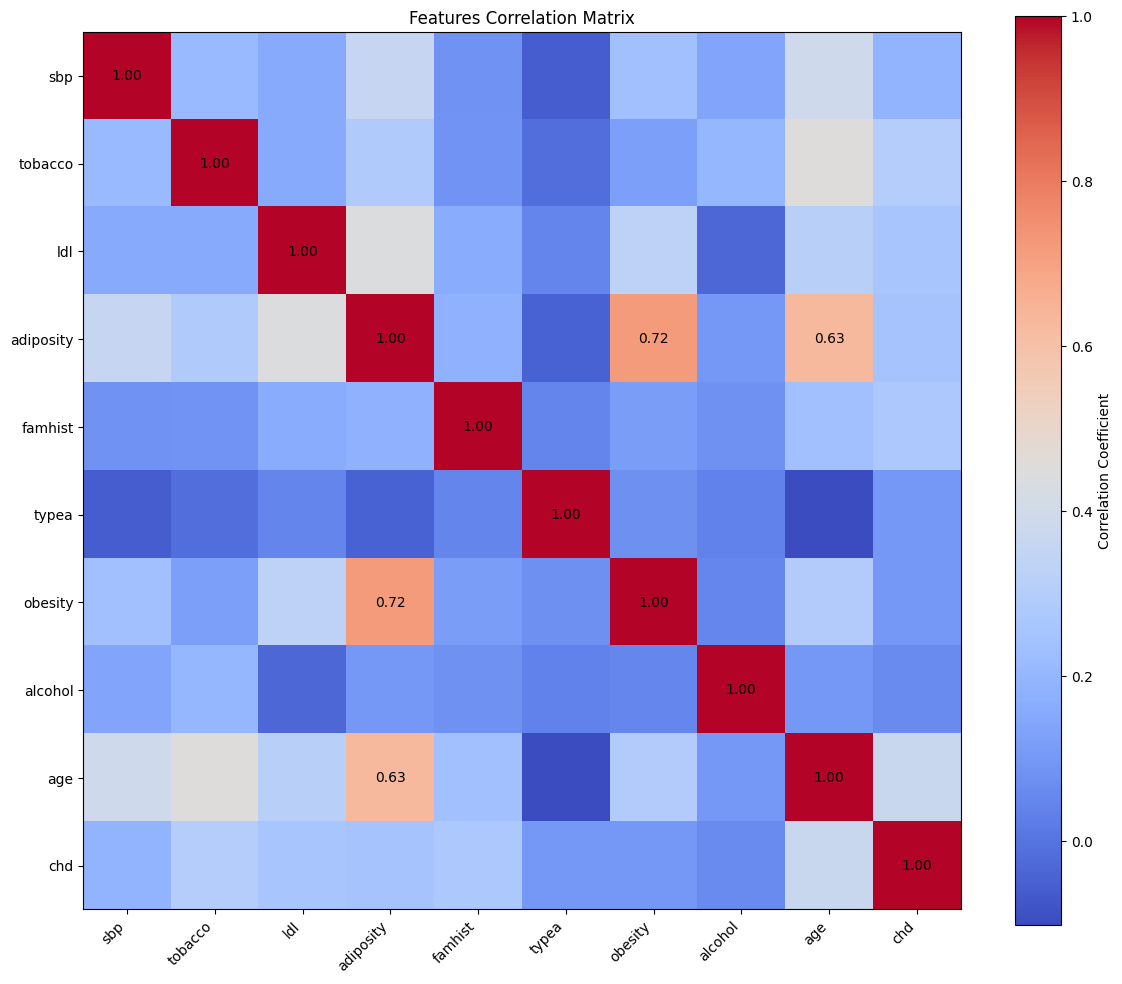

In [9]:
# Calculate the correlation matrix for numerical features
corr_matrix = df.corr()

# Create a heatmap using matplotlib
plt.figure(figsize=(12, 10))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Correlation Coefficient')


# Loop over the matrix and annotate only values > 0.5
for i in range(corr_matrix.shape[0]):
    for j in range(corr_matrix.shape[1]):
        # Check if the correlation value is greater than 0.5
        if corr_matrix.iloc[i, j] > 0.5:
            plt.text(j, i, f"{corr_matrix.iloc[i, j]:.2f}", 
                     ha='center', va='center', color='black')



# Rotate and align x-axis labels
plt.xticks(
    ticks=np.arange(len(corr_matrix.columns)),
    labels=corr_matrix.columns,
    rotation=45,
    ha='right'
)
plt.yticks(
    ticks=np.arange(len(corr_matrix.columns)),
    labels=corr_matrix.columns
)

plt.title('Features Correlation Matrix')
plt.tight_layout()
plt.show()


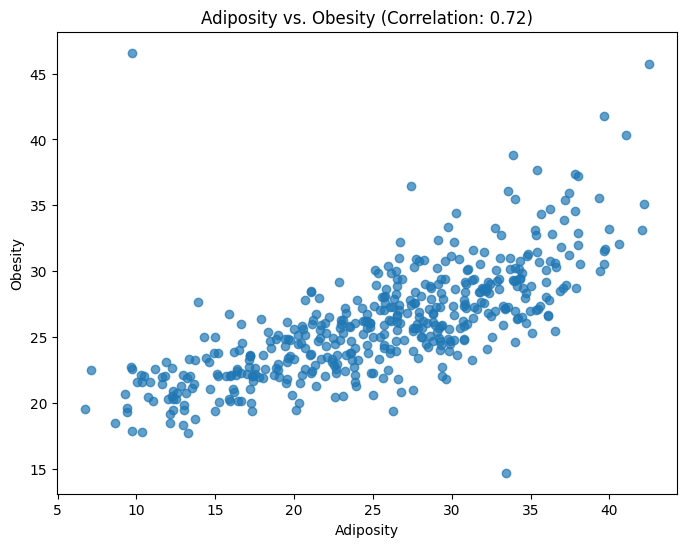

In [10]:
corr_adi_obe = np.corrcoef(df['adiposity'], df['obesity'])[0, 1]
    
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['adiposity'], df['obesity'], alpha=0.7)
plt.xlabel('Adiposity')
plt.ylabel('Obesity')
plt.title(f'Adiposity vs. Obesity (Correlation: {corr_adi_obe:.2f})')
plt.show()

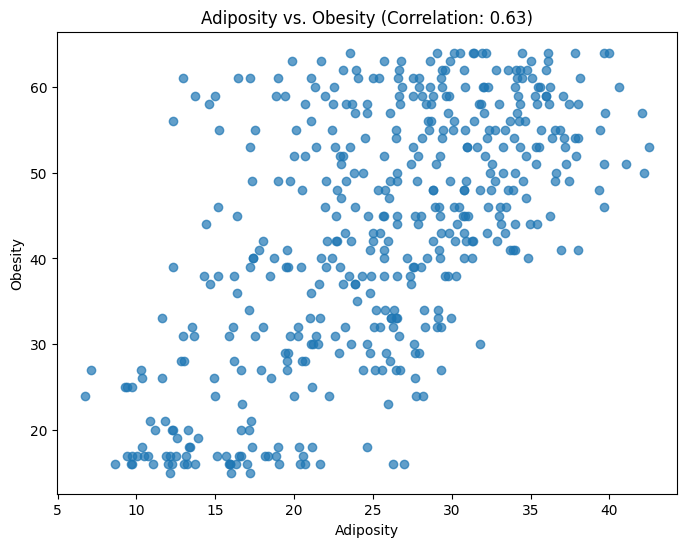

In [11]:
corr_adi_age = np.corrcoef(df['adiposity'], df['age'])[0, 1]
    
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['adiposity'], df['age'], alpha=0.7)
plt.xlabel('Adiposity')
plt.ylabel('Obesity')
plt.title(f'Adiposity vs. Obesity (Correlation: {corr_adi_age:.2f})')
plt.show()

## 2. Fit a **logistic regression** with **ridge penalty** to the data.

### a. Data Preprocessing


In [12]:
# Split data frame into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('chd', axis=1), df['chd'], test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Standardize the data
scaler = StandardScaler()
X_train_df = X_train.copy()
X_test_df = X_test.copy()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

(369, 9) (93, 9) (369,) (93,)


### b. Hyperparameter tuning (for roc_auc score)

In [13]:
# Define parameter grid
param_grid_ridge = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['lbfgs', 'saga'],  # Optimization solver
    'class_weight': [None, 'balanced']  # Handle imbalanced data
}

# Perform Grid Search
model_ridge_auc_best = GridSearchCV(LogisticRegression(penalty='l2', max_iter=1000),
                           param_grid_ridge, cv=10, scoring='roc_auc', n_jobs=-1)

# Fit the model
model_ridge_auc_best.fit(X_train, y_train)

# Predict the test set
y_pred_ridge_auc_best = model_ridge_auc_best.predict(X_test)
# Probabilities
y_scores_ridge_auc_best = model_ridge_auc_best.predict_proba(X_test)[:, 1]

# Get best parameters and model
best_params = model_ridge_auc_best.best_params_
print("Best Ridge Regression Hyperparameters (for roc_auc):", best_params)

# Print Confusion Matrix
print(confusion_matrix(y_test, y_pred_ridge_auc_best))
# Print the classification report
print(classification_report(y_test, y_pred_ridge_auc_best))
# Print ROC AUC score
print("ROC AUC Score:", roc_auc_score(y_test, y_scores_ridge_auc_best))

Best Ridge Regression Hyperparameters (for roc_auc): {'C': 0.01, 'class_weight': 'balanced', 'solver': 'lbfgs'}
[[42 17]
 [ 9 25]]
              precision    recall  f1-score   support

           0       0.82      0.71      0.76        59
           1       0.60      0.74      0.66        34

    accuracy                           0.72        93
   macro avg       0.71      0.72      0.71        93
weighted avg       0.74      0.72      0.72        93

ROC AUC Score: 0.8070787637088733


### d. Hyperparameter tuning (for accuracy score)

In [14]:
# Perform Grid Search
model_ridge_acc_best = GridSearchCV(LogisticRegression(penalty='l2', max_iter=1000),
                           param_grid_ridge, cv=10, scoring='accuracy', n_jobs=-1)

# Fit the model
model_ridge_acc_best.fit(X_train, y_train)

# Predict on the test set
y_pred_ridge_acc_best = model_ridge_acc_best.predict(X_test)
# Probabilities
y_scores_ridge_acc_best = model_ridge_acc_best.predict_proba(X_test)[:, 1]

# Get best parameters and model
best_params = model_ridge_acc_best.best_params_

# Print the best parameters
print("Best Hyperparameters (for accuracy):", best_params)

# Print Confusion Matrix, Classification Report, and ROC AUC Score
print(confusion_matrix(y_test, y_pred_ridge_acc_best))
print(classification_report(y_test, y_pred_ridge_acc_best))
print("ROC AUC Score (for roc_auc):", roc_auc_score(y_test, y_scores_ridge_acc_best))

Best Hyperparameters (for accuracy): {'C': 10, 'class_weight': None, 'solver': 'lbfgs'}
[[54  5]
 [15 19]]
              precision    recall  f1-score   support

           0       0.78      0.92      0.84        59
           1       0.79      0.56      0.66        34

    accuracy                           0.78        93
   macro avg       0.79      0.74      0.75        93
weighted avg       0.79      0.78      0.77        93

ROC AUC Score (for roc_auc): 0.8010967098703888


### e. Threshold tuning

In [15]:
thresholds = np.arange(0.1, 0.9, 0.1)
for t in thresholds:
    y_pred = (y_scores_ridge_auc_best >= t).astype(int)
    print(f"Threshold: {t:.1f}, Accuracy: {accuracy_score(y_test, y_pred):.2f}, "
          f"Precision: {precision_score(y_test, y_pred):.2f}, Recall: {recall_score(y_test, y_pred):.2f}",
          f"ROC_AUC: {roc_auc_score(y_test, y_pred):.2f}")

Threshold: 0.1, Accuracy: 0.37, Precision: 0.37, Recall: 1.00 ROC_AUC: 0.50
Threshold: 0.2, Accuracy: 0.40, Precision: 0.38, Recall: 1.00 ROC_AUC: 0.53
Threshold: 0.3, Accuracy: 0.48, Precision: 0.41, Recall: 0.97 ROC_AUC: 0.59
Threshold: 0.4, Accuracy: 0.59, Precision: 0.47, Recall: 0.94 ROC_AUC: 0.67
Threshold: 0.5, Accuracy: 0.72, Precision: 0.60, Recall: 0.74 ROC_AUC: 0.72
Threshold: 0.6, Accuracy: 0.76, Precision: 0.71, Recall: 0.59 ROC_AUC: 0.73
Threshold: 0.7, Accuracy: 0.72, Precision: 1.00, Recall: 0.24 ROC_AUC: 0.62
Threshold: 0.8, Accuracy: 0.65, Precision: 1.00, Recall: 0.03 ROC_AUC: 0.51


In [16]:
# Best ridge AUC model threshold adjustment
y_pred_adjusted_auc = (model_ridge_auc_best.predict_proba(X_test)[:, 1] > 0.5).astype(int)

# Print Confusion Matrix
print(confusion_matrix(y_test, y_pred_adjusted_auc))

# Print the classification report
print(classification_report(y_test, y_pred_adjusted_auc))

[[42 17]
 [ 9 25]]
              precision    recall  f1-score   support

           0       0.82      0.71      0.76        59
           1       0.60      0.74      0.66        34

    accuracy                           0.72        93
   macro avg       0.71      0.72      0.71        93
weighted avg       0.74      0.72      0.72        93



In [17]:
thresholds = np.arange(0.1, 0.9, 0.1)
for t in thresholds:
    y_pred = (y_scores_ridge_acc_best >= t).astype(int)
    print(f"Threshold: {t:.1f}, Accuracy: {accuracy_score(y_test, y_pred):.2f}, "
          f"Precision: {precision_score(y_test, y_pred):.2f}, Recall: {recall_score(y_test, y_pred):.2f}",
          f"ROC_AUC: {roc_auc_score(y_test, y_pred):.2f}")

Threshold: 0.1, Accuracy: 0.49, Precision: 0.42, Recall: 0.97 ROC_AUC: 0.60
Threshold: 0.2, Accuracy: 0.65, Precision: 0.51, Recall: 0.91 ROC_AUC: 0.70
Threshold: 0.3, Accuracy: 0.69, Precision: 0.56, Recall: 0.74 ROC_AUC: 0.70
Threshold: 0.4, Accuracy: 0.76, Precision: 0.69, Recall: 0.65 ROC_AUC: 0.74
Threshold: 0.5, Accuracy: 0.78, Precision: 0.79, Recall: 0.56 ROC_AUC: 0.74
Threshold: 0.6, Accuracy: 0.76, Precision: 0.83, Recall: 0.44 ROC_AUC: 0.70
Threshold: 0.7, Accuracy: 0.72, Precision: 1.00, Recall: 0.24 ROC_AUC: 0.62
Threshold: 0.8, Accuracy: 0.68, Precision: 1.00, Recall: 0.12 ROC_AUC: 0.56


In [18]:
# Best ridge Accuracy model threshold adjustment
y_pred_adjusted_acc = (model_ridge_acc_best.predict_proba(X_test)[:, 1] > 0.4).astype(int)

# Print Confusion Matrix
print(confusion_matrix(y_test, y_pred_adjusted_acc))

# Print the classification report
print(classification_report(y_test, y_pred_adjusted_acc))

[[49 10]
 [12 22]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.82        59
           1       0.69      0.65      0.67        34

    accuracy                           0.76        93
   macro avg       0.75      0.74      0.74        93
weighted avg       0.76      0.76      0.76        93



### f. Feature Engineering

#### i. Feature importance

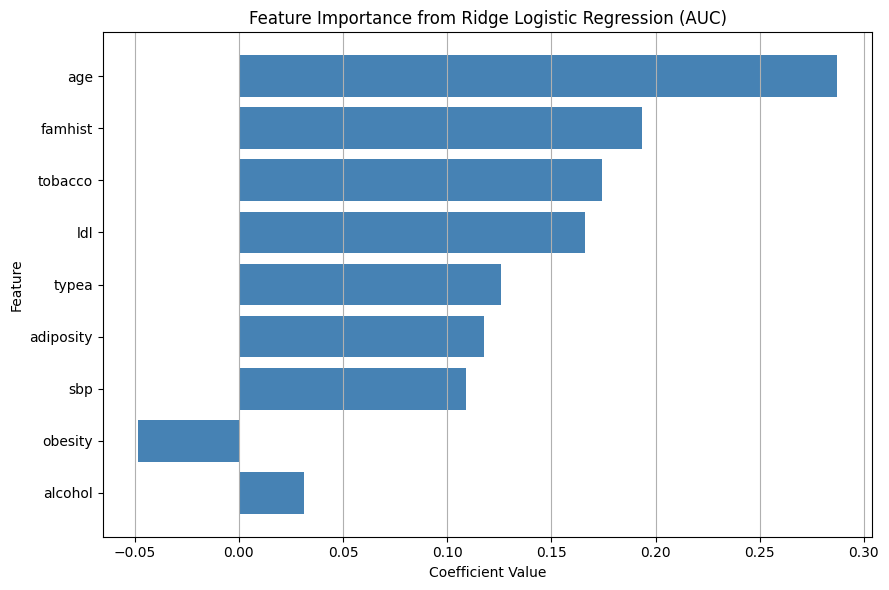

In [19]:
# Get Coefficients for the best model (AUC)
coefs = model_ridge_auc_best.best_estimator_.coef_[0]

# Create a DataFrame with the coefficients
feature_importance = pd.DataFrame({
    'Feature': X_train_df.columns,
    'Coefficient': coefs,
    'Absolute Importance': np.abs(coefs)
})

# Sort the values by absolute importance
feature_importance = feature_importance.sort_values(by='Absolute Importance', ascending=True)

# Plot the feature importance
plt.figure(figsize=(9, 6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance from Ridge Logistic Regression (AUC)')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

#### ii. Remove obesity

In [20]:
# Drop 'obesity' from the data
X_train_filtered_df = X_train_df.drop(columns=['obesity'])
X_test_filtered_df = X_test_df.drop(columns=['obesity'])

# Standardize data
X_train_filtered = scaler.fit_transform(X_train_filtered_df)
X_test_filtered = scaler.transform(X_test_filtered_df)

# Perform Grid Search (for best roc_auc)
model_ridge_auc_best_filtered = GridSearchCV(LogisticRegression(penalty='l2', max_iter=1000),
                           param_grid_ridge, cv=10, scoring='roc_auc', n_jobs=-1)

# Fit the model
model_ridge_auc_best_filtered.fit(X_train_filtered, y_train)

# Predict probabilities for the test data
y_scores_ridge_auc_filtered = model_ridge_auc_best_filtered.predict_proba(X_test_filtered)[:, 1]

# Get best parameters and model
best_params_no_obe_auc = model_ridge_auc_best_filtered.best_params_

# Print the best parameters
print("Best Hyperparameters (with no 'obesity'):", best_params_no_obe_auc)

# Print confusion matrix
print(confusion_matrix(y_test, model_ridge_auc_best_filtered.predict(X_test_filtered)))

# Print the classification report
print(classification_report(y_test, model_ridge_auc_best_filtered.predict(X_test_filtered)))

# Print ROC AUC Score
print("ROC AUC Score (for roc_auc):", roc_auc_score(y_test, y_scores_ridge_auc_filtered))

Best Hyperparameters (with no 'obesity'): {'C': 0.01, 'class_weight': 'balanced', 'solver': 'lbfgs'}
[[42 17]
 [ 8 26]]
              precision    recall  f1-score   support

           0       0.84      0.71      0.77        59
           1       0.60      0.76      0.68        34

    accuracy                           0.73        93
   macro avg       0.72      0.74      0.72        93
weighted avg       0.75      0.73      0.74        93

ROC AUC Score (for roc_auc): 0.8050847457627118


In [21]:
# Perform Grid Search (for best accuracy)
model_ridge_acc_best_filtered = GridSearchCV(LogisticRegression(penalty='l2', max_iter=1000),
                           param_grid_ridge, cv=10, scoring='accuracy', n_jobs=-1)

# Fit the model
model_ridge_acc_best_filtered.fit(X_train_filtered, y_train)

# Predict probabilities for the test data
y_scores_ridge_acc_filtered = model_ridge_acc_best_filtered.predict_proba(X_test_filtered)[:, 1]

# Get best parameters and model
best_params_no_obe_acc = model_ridge_acc_best_filtered.best_params_

# Print the best parameters
print("Best Hyperparameters (with no 'obesity'):", best_params_no_obe_acc)

# Print confusion matrix
print(confusion_matrix(y_test, model_ridge_acc_best_filtered.predict(X_test_filtered)))

# Print the classification report
print(classification_report(y_test, model_ridge_acc_best_filtered.predict(X_test_filtered)))

# Print ROC AUC Score
print("ROC AUC Score (for roc_auc):", roc_auc_score(y_test, y_scores_ridge_acc_filtered))

Best Hyperparameters (with no 'obesity'): {'C': 1, 'class_weight': None, 'solver': 'lbfgs'}
[[53  6]
 [15 19]]
              precision    recall  f1-score   support

           0       0.78      0.90      0.83        59
           1       0.76      0.56      0.64        34

    accuracy                           0.77        93
   macro avg       0.77      0.73      0.74        93
weighted avg       0.77      0.77      0.76        93

ROC AUC Score (for roc_auc): 0.8100697906281156


#### iii. Polynomial features with interaction terms

In [22]:
# Polynomial Features expansion on the SCALED data
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Perform Grid Search (for best roc_auc)
model_ridge_auc_best_poly = GridSearchCV(LogisticRegression(penalty='l2', max_iter=4000),
                           param_grid_ridge, cv=10, scoring='roc_auc', n_jobs=-1)

# Fit the model
model_ridge_auc_best_poly.fit(X_train_poly, y_train)

# Predict probabilities for the test data
y_scores_ridge_auc_poly = model_ridge_auc_best_poly.predict_proba(X_test_poly)[:, 1]

# Get best parameters and model and print the best parameters
best_params_poly_auc = model_ridge_auc_best_poly.best_params_
print("Best Hyperparameters (with Polynomial Features):", best_params_poly_auc)
print()
print(f"Original features: {X_train.shape[1]}")
print(f"Polynomial features: {X_train_poly.shape[1]}")
print()
# Print confusion matrix
print(confusion_matrix(y_test, model_ridge_auc_best_poly.predict(X_test_poly)))
# Print the classification report
print(classification_report(y_test, model_ridge_auc_best_poly.predict(X_test_poly)))
# Print ROC AUC Score
print("ROC AUC Score (for roc_auc):", roc_auc_score(y_test, y_scores_ridge_auc_poly))

Best Hyperparameters (with Polynomial Features): {'C': 0.01, 'class_weight': None, 'solver': 'lbfgs'}

Original features: 9
Polynomial features: 54

[[54  5]
 [19 15]]
              precision    recall  f1-score   support

           0       0.74      0.92      0.82        59
           1       0.75      0.44      0.56        34

    accuracy                           0.74        93
   macro avg       0.74      0.68      0.69        93
weighted avg       0.74      0.74      0.72        93

ROC AUC Score (for roc_auc): 0.784147557328016


In [23]:
coefs = model_ridge_auc_best_poly.best_estimator_.coef_[0]
poly_feature_names = poly.get_feature_names_out(X_train_df.columns)

importance_df = pd.DataFrame({
    'Feature': poly_feature_names,
    'Coefficient': coefs,
    'Abs Coefficient': np.abs(coefs)
}).sort_values(by='Abs Coefficient', ascending=False)

print(importance_df.head(10))

            Feature  Coefficient  Abs Coefficient
8               age     0.245324         0.245324
4           famhist     0.174559         0.174559
2               ldl     0.131750         0.131750
28      ldl famhist     0.125436         0.125436
1           tobacco     0.122187         0.122187
9             sbp^2     0.119959         0.119959
5             typea     0.117563         0.117563
3         adiposity     0.102927         0.102927
49  obesity alcohol    -0.089587         0.089587
22    tobacco typea    -0.087833         0.087833


#### iv. Binning

In [24]:
# Create new df for binning
df_bin = df.copy()

# Apply binning to 'age' column
df_bin['age_bin'] = pd.cut(df_bin['age'], bins=[0,45,60,100], labels=['young','middle','older'])

# Check distribution of 'age_bin'
print(df_bin['age_bin'].value_counts())

# Convert to dummy variables (one-hot encoding)
df_bin = pd.get_dummies(df_bin, columns=['age_bin'], drop_first=True)

# Prepare data for modeling
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(df_bin.drop('chd', axis=1), df_bin['chd'], test_size=0.2, random_state=42)

# Standardize data
scaler = StandardScaler()
X_train_bin = scaler.fit_transform(X_train_bin)
X_test_bin = scaler.transform(X_test_bin)

# Perform Grid Search (for best roc_auc)
model_ridge_auc_best_bin = GridSearchCV(LogisticRegression(penalty='l2', max_iter=4000),
                           param_grid_ridge, cv=10, scoring='roc_auc', n_jobs=-1)

# Fit the model
model_ridge_auc_best_bin.fit(X_train_bin, y_train_bin)

# Predict class labels and probabilities for the test data
y_pred_ridge_auc_best_bin = model_ridge_auc_best_bin.predict(X_test_bin)
y_scores_ridge_auc_best_bin = model_ridge_auc_best_bin.predict_proba(X_test_bin)[:, 1]



print("Best Hyperparameters (with Binned Age):", model_ridge_auc_best_bin.best_params_)
print("Confusion Matrix:")
print(confusion_matrix(y_test_bin, y_pred_ridge_auc_best_bin))
print("Classification Report:")
print(classification_report(y_test_bin, y_pred_ridge_acc_best))
print("ROC AUC Score:", roc_auc_score(y_test_bin, y_scores_ridge_auc_best_bin))


age_bin
young     241
middle    172
older      49
Name: count, dtype: int64
Best Hyperparameters (with Binned Age): {'C': 0.1, 'class_weight': 'balanced', 'solver': 'lbfgs'}
Confusion Matrix:
[[40 19]
 [10 24]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.92      0.84        59
           1       0.79      0.56      0.66        34

    accuracy                           0.78        93
   macro avg       0.79      0.74      0.75        93
weighted avg       0.79      0.78      0.77        93

ROC AUC Score: 0.8055832502492523


In [25]:
# Get feature names and coefficients
feature_names = df_bin.drop(columns='chd').columns
coefs = model_ridge_auc_best_bin.best_estimator_.coef_[0]

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefs,
    'Abs_Coefficient': np.abs(coefs)
}).sort_values(by='Abs_Coefficient', ascending=False)

print(importance_df.head(10))


          Feature  Coefficient  Abs_Coefficient
8             age     0.597048         0.597048
4         famhist     0.342951         0.342951
5           typea     0.334230         0.334230
2             ldl     0.297794         0.297794
1         tobacco     0.258121         0.258121
6         obesity    -0.240555         0.240555
3       adiposity     0.164034         0.164034
0             sbp     0.141546         0.141546
7         alcohol     0.042808         0.042808
9  age_bin_middle    -0.001430         0.001430


## 3. Explore other classifiers discussed in this module and find one that gives you the highest accuracy. Explain your procedure to achieve the final chosen classifier and discuss the results.

### a. kNN

In [26]:
# Define parameter grid for `k`
param_grid_knn = {'n_neighbors': list(range(1, 41))}

# Perform Grid Search
model_knn_best = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=10, scoring='roc_auc', n_jobs=-1)

# Fit the model
model_knn_best.fit(X_train, y_train)

# Predict on the test data
y_pred_knn_best = model_knn_best.predict(X_test)

# Get best `k`
best_k = model_knn_best.best_params_['n_neighbors']

# Print the best `k`
print(f"Best k: {best_k}")

# Print Confusion Matrix
print(confusion_matrix(y_test, y_pred_knn_best))

# Print the classification report
print(classification_report(y_test, y_pred_knn_best))

# Print the ROC AUC score
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_knn_best)}")

Best k: 38
[[57  2]
 [24 10]]
              precision    recall  f1-score   support

           0       0.70      0.97      0.81        59
           1       0.83      0.29      0.43        34

    accuracy                           0.72        93
   macro avg       0.77      0.63      0.62        93
weighted avg       0.75      0.72      0.68        93

ROC AUC: 0.6301096709870389


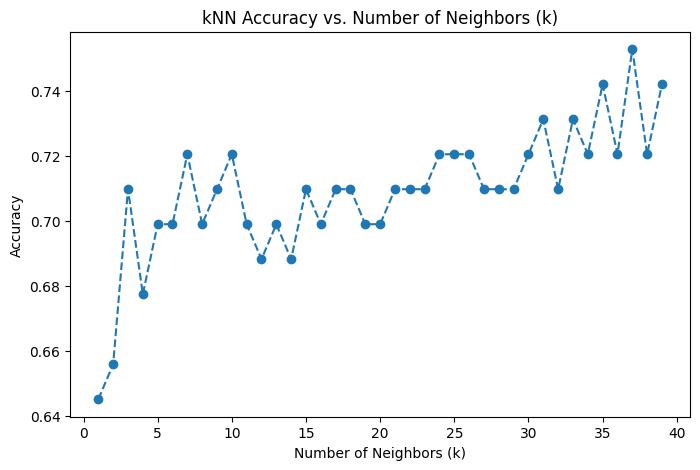

In [27]:
# Test different k values
k_values = range(1, 40)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plot accuracy vs. k
plt.figure(figsize=(8,5))
plt.plot(k_values, accuracies, marker='o', linestyle='dashed')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("kNN Accuracy vs. Number of Neighbors (k)")
plt.show()

### b. Decision Tree


In [28]:
# Define the parameter grid
param_grid = {
    'ccp_alpha': [1,0.1,0.01,0.001,0.0001],
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, None],
    'min_samples_leaf': [1, 3, 5, 10, 15],  
    'min_samples_split': [2, 5, 10]
}

# Initialize Decision Tree
dt = DecisionTreeClassifier(random_state=42)

# Perform Grid Search
model_dt_best = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
model_dt_best.fit(X_train, y_train)

# Predict on the test data
y_pred_dt_best = model_dt_best.predict(X_test)

# Get best hyperparameters
best_params_dt = model_dt_best.best_params_


In [29]:
# Print the best hyperparameters
print("Best Decision Tree Hyperparameters:", best_params_dt)

# Print Confusion Matrix
print(confusion_matrix(y_test, y_pred_dt_best))

# Evaluate the model
print("Classification report (Best Decision Tree):\n", classification_report(y_test, y_pred_dt_best))

Best Decision Tree Hyperparameters: {'ccp_alpha': 0.01, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 15, 'min_samples_split': 2}
[[43 16]
 [14 20]]
Classification report (Best Decision Tree):
               precision    recall  f1-score   support

           0       0.75      0.73      0.74        59
           1       0.56      0.59      0.57        34

    accuracy                           0.68        93
   macro avg       0.65      0.66      0.66        93
weighted avg       0.68      0.68      0.68        93



### c. Random Forest

In [30]:
# Define the parameter grid
param_grid = {
    'n_estimators': [300],
    'max_depth': [5, 10, 15],  
    'min_samples_split': [10, 15, 20, 25],  
    'min_samples_leaf': [1, 2, 5, 7],
    'max_features': [1, 2, 3, 5, 7, 9, 'sqrt', 'log2', None],
    'bootstrap': [True, False]
    #'ccp_alpha': [1,0.1,0.01,0.001,0.0001]
}

# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

# Perform Grid Search for best roc_auc
model_rf_best_auc = GridSearchCV(rf, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
# Perform Grid Search for best accuracy
model_rf_best_acc = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model for best roc_auc
model_rf_best_auc.fit(X_train, y_train)
# Fit the model for best accuracy
model_rf_best_acc.fit(X_train, y_train)

# Predict on test set
y_pred_rf_best_auc = model_rf_best_auc.predict(X_test)
y_pred_rf_best_acc = model_rf_best_acc.predict(X_test)

# Get best hyperparameters
best_params_rf_auc = model_rf_best_auc.best_params_
best_params_rf_acc = model_rf_best_acc.best_params_

In [31]:
# Print Best Hyperparameters for AUC
print("Best Random Forest Hyperparameters for best roc_auc:", best_params_rf_auc)

# Print Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_best_auc))

# Print Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_rf_best_auc))

# Print AUC Score
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_rf_best_auc))

Best Random Forest Hyperparameters for best roc_auc: {'bootstrap': True, 'max_depth': 5, 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Confusion Matrix:
 [[56  3]
 [21 13]]
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.95      0.82        59
           1       0.81      0.38      0.52        34

    accuracy                           0.74        93
   macro avg       0.77      0.67      0.67        93
weighted avg       0.76      0.74      0.71        93

ROC AUC Score: 0.6657527417746759


In [32]:
# Print Best Hyperparameters for Accuracy
print("Best Random Forest Hyperparameters for accuracy:", best_params_rf_acc)

# Print Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_best_acc))

# Print Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_rf_best_acc))

# Print AUC Score
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_rf_best_acc))

Best Random Forest Hyperparameters for accuracy: {'bootstrap': True, 'max_depth': 5, 'max_features': 1, 'min_samples_leaf': 2, 'min_samples_split': 20, 'n_estimators': 300}
Confusion Matrix:
 [[56  3]
 [22 12]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.95      0.82        59
           1       0.80      0.35      0.49        34

    accuracy                           0.73        93
   macro avg       0.76      0.65      0.65        93
weighted avg       0.75      0.73      0.70        93

ROC AUC Score: 0.6510468594217349


### d. Gradient Boosting

In [33]:
grd = GradientBoostingClassifier(max_depth=3, n_estimators = 100, random_state=42)

# Set the parameters for tuning
tuned_parameters = [{'learning_rate': [0.001, 0.01, 0.1, 1], 
                     'n_estimators': [100, 200, 300], 
                     'max_depth': [3, 5, 7]}]

# Tune hyperparameters
model_gb_best = GridSearchCV(grd, tuned_parameters, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit the model
model_gb_best.fit(X_train, y_train)

# Predict on the test data
y_pred_gb_best = model_gb_best.predict(X_test)

# Get best hyperparameters
best_params_gb = model_gb_best.best_params_

# Print the best hyperparameters
print("Best Gradient Boosting Hyperparameters:", best_params_gb)

# Print Confusion Matrix
print(confusion_matrix(y_test, y_pred_gb_best))

# Evaluate the model
print("Classification report (Best Gradient Boosting):\n", classification_report(y_test, y_pred_gb_best))

# Print AUC Score
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_gb_best))

Best Gradient Boosting Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
[[50  9]
 [18 16]]
Classification report (Best Gradient Boosting):
               precision    recall  f1-score   support

           0       0.74      0.85      0.79        59
           1       0.64      0.47      0.54        34

    accuracy                           0.71        93
   macro avg       0.69      0.66      0.66        93
weighted avg       0.70      0.71      0.70        93

ROC AUC Score: 0.6590229312063809


### e. SVM

In [34]:
# Define parameter grid
param_grid = {
    'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 100, 150, 200],
    'gamma': ['scale', 'auto', 0.001, 0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

# Perform GridSearchCV
model_svm_best = GridSearchCV(SVC(probability=True), param_grid, cv=10, scoring='roc_auc', n_jobs=-1)

# Train the model
model_svm_best.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = model_svm_best.predict(X_test)

# Print best parameters
print("Best Parameters:", model_svm_best.best_params_)

# Print Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

# Print Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

Best Parameters: {'C': 200, 'gamma': 0.001, 'kernel': 'rbf'}
Confusion Matrix:
 [[54  5]
 [15 19]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.92      0.84        59
           1       0.79      0.56      0.66        34

    accuracy                           0.78        93
   macro avg       0.79      0.74      0.75        93
weighted avg       0.79      0.78      0.77        93



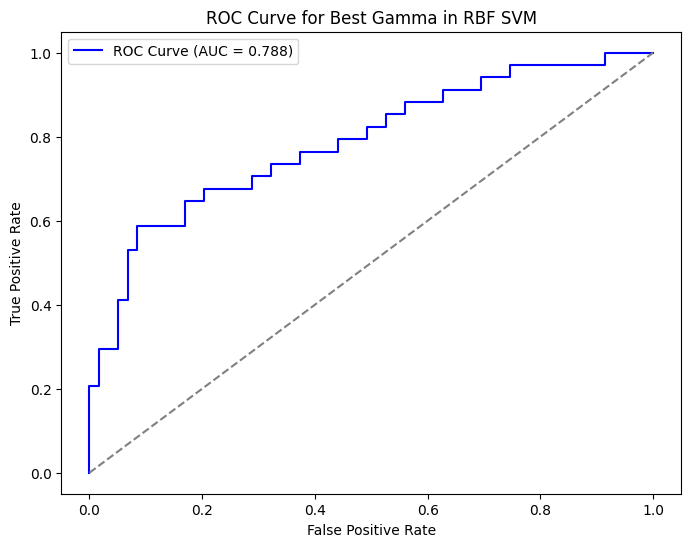

Best Gamma: 0.001
Best AUC Score: 0.788


In [35]:
# Predict probabilities on the test set
y_scores = model_svm_best.predict_proba(X_test)[:, 1]

# Compute AUC and ROC curve
auc_score = roc_auc_score(y_test, y_scores)
fpr, tpr, _ = roc_curve(y_test, y_scores)

# Plot the ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for Best Gamma in RBF SVM')
plt.legend()
plt.show()

# Print best gamma and AUC score
print(f"Best Gamma: {model_svm_best.best_params_['gamma']}")
print(f"Best AUC Score: {auc_score:.3f}")

### f. LDA & FDA

In [36]:
# Define parameter grid
param_grid_lda = [
    {'solver': ['svd']},  # no shrinkage allowed
    {'solver': ['lsqr'], 'shrinkage': ['auto', 0.1, 0.5, 0.9, None]},
    {'solver': ['eigen'], 'shrinkage': ['auto', 0.1, 0.5, 0.9, None]},
]

# Initialize LDA model
lda = LinearDiscriminantAnalysis()

# Perform Grid Search for auc_score
model_lda_auc = GridSearchCV(lda, param_grid_lda, cv=10, scoring='roc_auc', n_jobs=-1)

# Fit the model
model_lda_auc.fit(X_train, y_train)

# Predict on the test set
y_pred_lda = model_lda_auc.predict(X_test)
# Predict probabilities on the test set
y_scores_lda = model_lda_auc.predict_proba(X_test)[:, 1]

# Get best hyperparameters and print them
best_params_lda = model_lda_auc.best_params_
print("Best Hyperparameters (for roc_auc):", best_params_lda)

# Print Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lda))
# Print Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_lda))
# Print AUC Score
print("ROC AUC Score:", roc_auc_score(y_test, y_scores_lda))

Best Hyperparameters (for roc_auc): {'shrinkage': 0.5, 'solver': 'lsqr'}
Confusion Matrix:
 [[48 11]
 [13 21]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.81      0.80        59
           1       0.66      0.62      0.64        34

    accuracy                           0.74        93
   macro avg       0.72      0.72      0.72        93
weighted avg       0.74      0.74      0.74        93

ROC AUC Score: 0.8110667996011964


### g. QDA

In [37]:
# Create GridSearchCV for roc_auc
param_grid_qda = {'reg_param': [0.0, 0.1, 0.3, 0.5, 0.9]}

# Initialize QDA model
qda = QuadraticDiscriminantAnalysis(store_covariance=True)

# Perform Grid Search
model_qda_auc = GridSearchCV(qda, param_grid_qda, cv=10, scoring='roc_auc', n_jobs=-1)

# Fit the model
model_qda_auc.fit(X_train, y_train)

# Predict on the test set
y_pred_qda = model_qda_auc.predict(X_test)

# Predict probabilities on the test set
y_scores_qda = model_qda_auc.predict_proba(X_test)[:, 1]

# Get best hyperparameters and print them
best_params_qda = model_qda_auc.best_params_
print("Best Hyperparameters (for roc_auc):", best_params_qda)

# Print Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_qda))
# Print Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_qda))
# Print AUC Score
print("ROC AUC Score:", roc_auc_score(y_test, y_scores_qda))

Best Hyperparameters (for roc_auc): {'reg_param': 0.5}
Confusion Matrix:
 [[51  8]
 [11 23]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84        59
           1       0.74      0.68      0.71        34

    accuracy                           0.80        93
   macro avg       0.78      0.77      0.78        93
weighted avg       0.79      0.80      0.79        93

ROC AUC Score: 0.7871385842472582


In [38]:
# Prior probabilities for each class
qda = model_qda_auc.best_estimator_
qda.priors_

array([0.65853659, 0.34146341])

In [39]:
# Means for each feature in each class
pd.DataFrame(qda.means_, columns=X_train_df.columns, index=['Non-CHD', 'CHD'])

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age
Non-CHD,-0.145816,-0.193848,-0.180533,-0.181910,-0.181731,-0.069730,-0.056858,-0.044383,-0.271965
CHD,0.281217,0.373850,0.348170,0.350827,0.350481,0.134479,0.109655,0.085596,0.524505


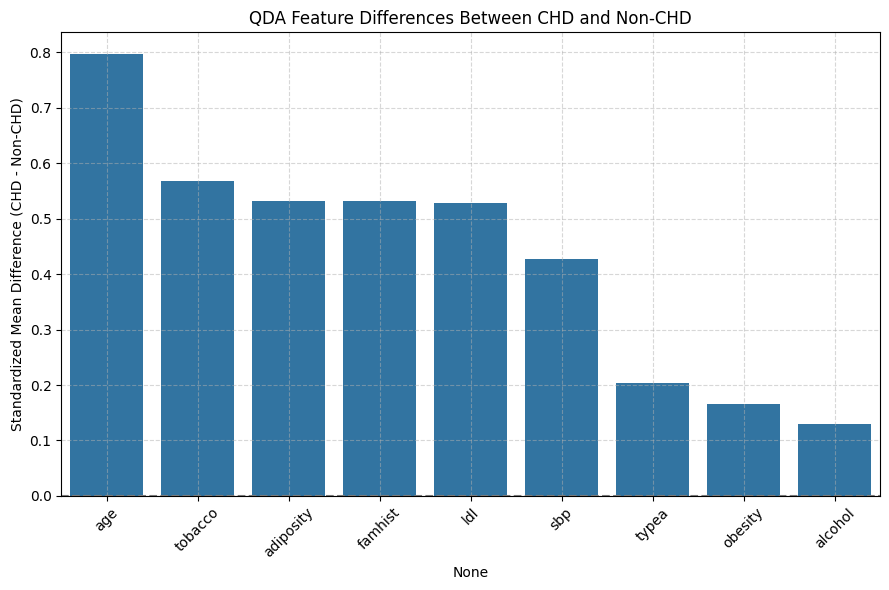

In [40]:
# Get means and compute difference
means = pd.DataFrame(qda.means_, columns=X_train_df.columns, index=['Non-CHD', 'CHD'])
diff = means.loc['CHD'] - means.loc['Non-CHD']
diff_sorted = diff.sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(9, 6))
sns.barplot(x=diff_sorted.index, y=diff_sorted.values)
plt.axhline(0, color='gray', linestyle='--')
plt.ylabel("Standardized Mean Difference (CHD - Non-CHD)")
plt.title("QDA Feature Differences Between CHD and Non-CHD")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

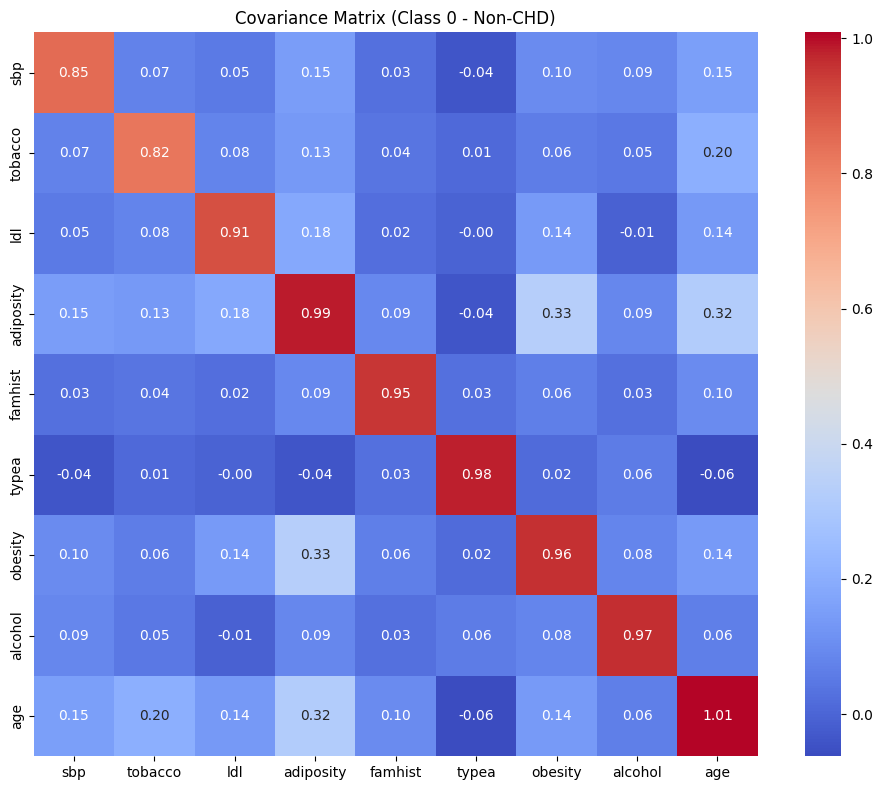

In [41]:
# Get covariance matrix for class 0 (non-CHD)
cov_matrix = qda.covariance_[0]
features = X_train_df.columns

# Convert to DataFrame
cov_df = pd.DataFrame(cov_matrix, index=features, columns=features)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cov_df, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Covariance Matrix (Class 0 - Non-CHD)")
plt.tight_layout()
plt.show()

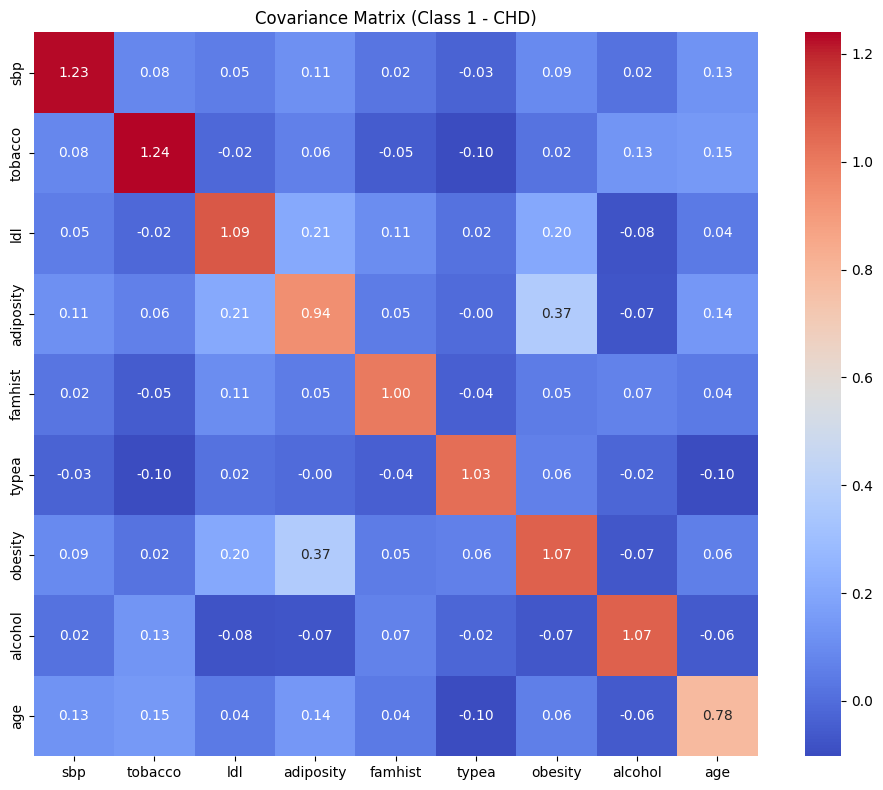

In [42]:
# Get covariance matrix for class 1 (CHD)
cov_matrix = qda.covariance_[1]
features = X_train_df.columns

# Convert to DataFrame
cov_df = pd.DataFrame(cov_matrix, index=features, columns=features)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cov_df, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Covariance Matrix (Class 1 - CHD)")
plt.tight_layout()
plt.show()

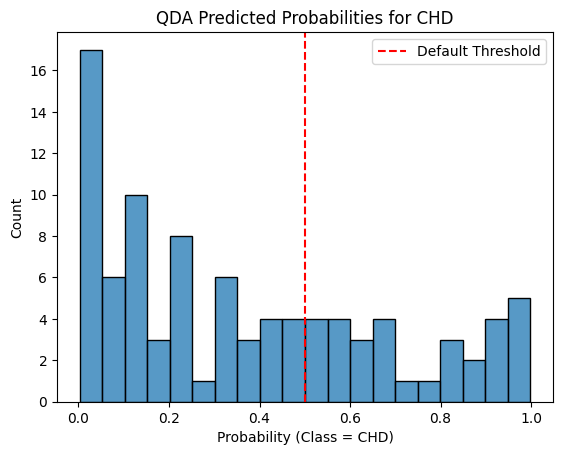

In [43]:
sns.histplot(y_scores_qda, bins=20) #, kde=True)
plt.axvline(0.5, color='red', linestyle='--', label='Default Threshold')
plt.title("QDA Predicted Probabilities for CHD")
plt.xlabel("Probability (Class = CHD)")
plt.legend()

# III. Try SMOTE

In [44]:
# Apply SMOTE ONLY on training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Scale both sets
X_train_smote = scaler.fit_transform(X_train_smote)
X_test_smote = scaler.transform(X_test)


## 1. On Ridge Logistic Regression

In [45]:
# Fit Ridge Regression model on resampled data
model_ridge_auc_best.fit(X_train_smote, y_train_smote)

# Predict on the test data
y_pred_ridge_auc_best_smote = model_ridge_auc_best.predict(X_test_smote)

# Get best parameters and model
best_params = model_ridge_auc_best.best_params_
print("Best Hyperparameters (for roc_auc):", best_params)

# Print Confusion Matrix
print(confusion_matrix(y_test, y_pred_ridge_auc_best_smote))
# Print the classification report
print(classification_report(y_test, y_pred_ridge_auc_best_smote))
# Print ROC AUC Score
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_ridge_auc_best_smote))

Best Hyperparameters (for roc_auc): {'C': 0.1, 'class_weight': None, 'solver': 'lbfgs'}
[[41 18]
 [11 23]]
              precision    recall  f1-score   support

           0       0.79      0.69      0.74        59
           1       0.56      0.68      0.61        34

    accuracy                           0.69        93
   macro avg       0.67      0.69      0.68        93
weighted avg       0.71      0.69      0.69        93

ROC AUC Score: 0.6856929212362911


## 2. On QDA

In [46]:
# Fit the model on the resampled data
model_qda_auc.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred_qda_SMOTE = model_qda_auc.predict(X_test_smote)

# Predict probabilities on the test set
y_scores_qda_SMOTE = model_qda_auc.predict_proba(X_test_smote)[:, 1]

# Get best hyperparameters and print them
best_params_qda = model_qda_auc.best_params_
print("Best Hyperparameters (for roc_auc):", best_params_qda)
# Print Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_qda_SMOTE))
# Print Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_qda_SMOTE))
# Print AUC Score
print("ROC AUC Score:", roc_auc_score(y_test, y_scores_qda_SMOTE))

Best Hyperparameters (for roc_auc): {'reg_param': 0.3}
Confusion Matrix:
 [[43 16]
 [ 8 26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.73      0.78        59
           1       0.62      0.76      0.68        34

    accuracy                           0.74        93
   macro avg       0.73      0.75      0.73        93
weighted avg       0.76      0.74      0.75        93

ROC AUC Score: 0.7821535393818544


## 3. On Random Forest

In [47]:
## 3. On Random Forest
# Fit the model on the resampled data
model_rf_best_auc.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred_rf_best_auc_SMOTE = model_rf_best_auc.predict(X_test_smote)

# Get best hyperparameters and print them
best_params_rf_auc = model_rf_best_auc.best_params_
print("Best Random Forest Hyperparameters for best roc_auc:", best_params_rf_auc)

# Print Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_best_auc_SMOTE))
# Print Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_rf_best_auc_SMOTE))
# Print AUC Score
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_rf_best_auc_SMOTE))


Best Random Forest Hyperparameters for best roc_auc: {'bootstrap': False, 'max_depth': 15, 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Confusion Matrix:
 [[46 13]
 [11 23]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.78      0.79        59
           1       0.64      0.68      0.66        34

    accuracy                           0.74        93
   macro avg       0.72      0.73      0.73        93
weighted avg       0.75      0.74      0.74        93

ROC AUC Score: 0.7280658025922233
